In [6]:
import torch

In [3]:
names = open('names.txt', 'r', encoding='utf8').read()

In [5]:
names = names.split()
names[:10]

['Галка',
 'Радимила',
 'Всевед',
 'Емiлiан',
 'Боговлада',
 'Явдоким',
 'Радило',
 'Уліб',
 'Дарій',
 'Огій']

In [7]:
f'Кількість імен: {len(names)}'

'Кількість імен: 2088'

### Bigram

In [44]:
b = {}

for name in names[:1]:
  chs = ['<S>'] + list(name) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    print(f"{ch1} -> {ch2}")
    b[bigram] = b.get(bigram, 0) + 1

<S> -> Г
Г -> а
а -> л
л -> к
к -> а
а -> <E>


#### Vocabulary

In [19]:
chars = sorted(list(set(''.join(names))))

voc_size = len(chars)

stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i+1:s for i, s in enumerate(chars)}
itos[0] = '.'

voc_size += 1

In [20]:
N = torch.zeros((voc_size, voc_size), dtype=torch.int32)

In [21]:
N.shape

torch.Size([64, 64])

#### Representation

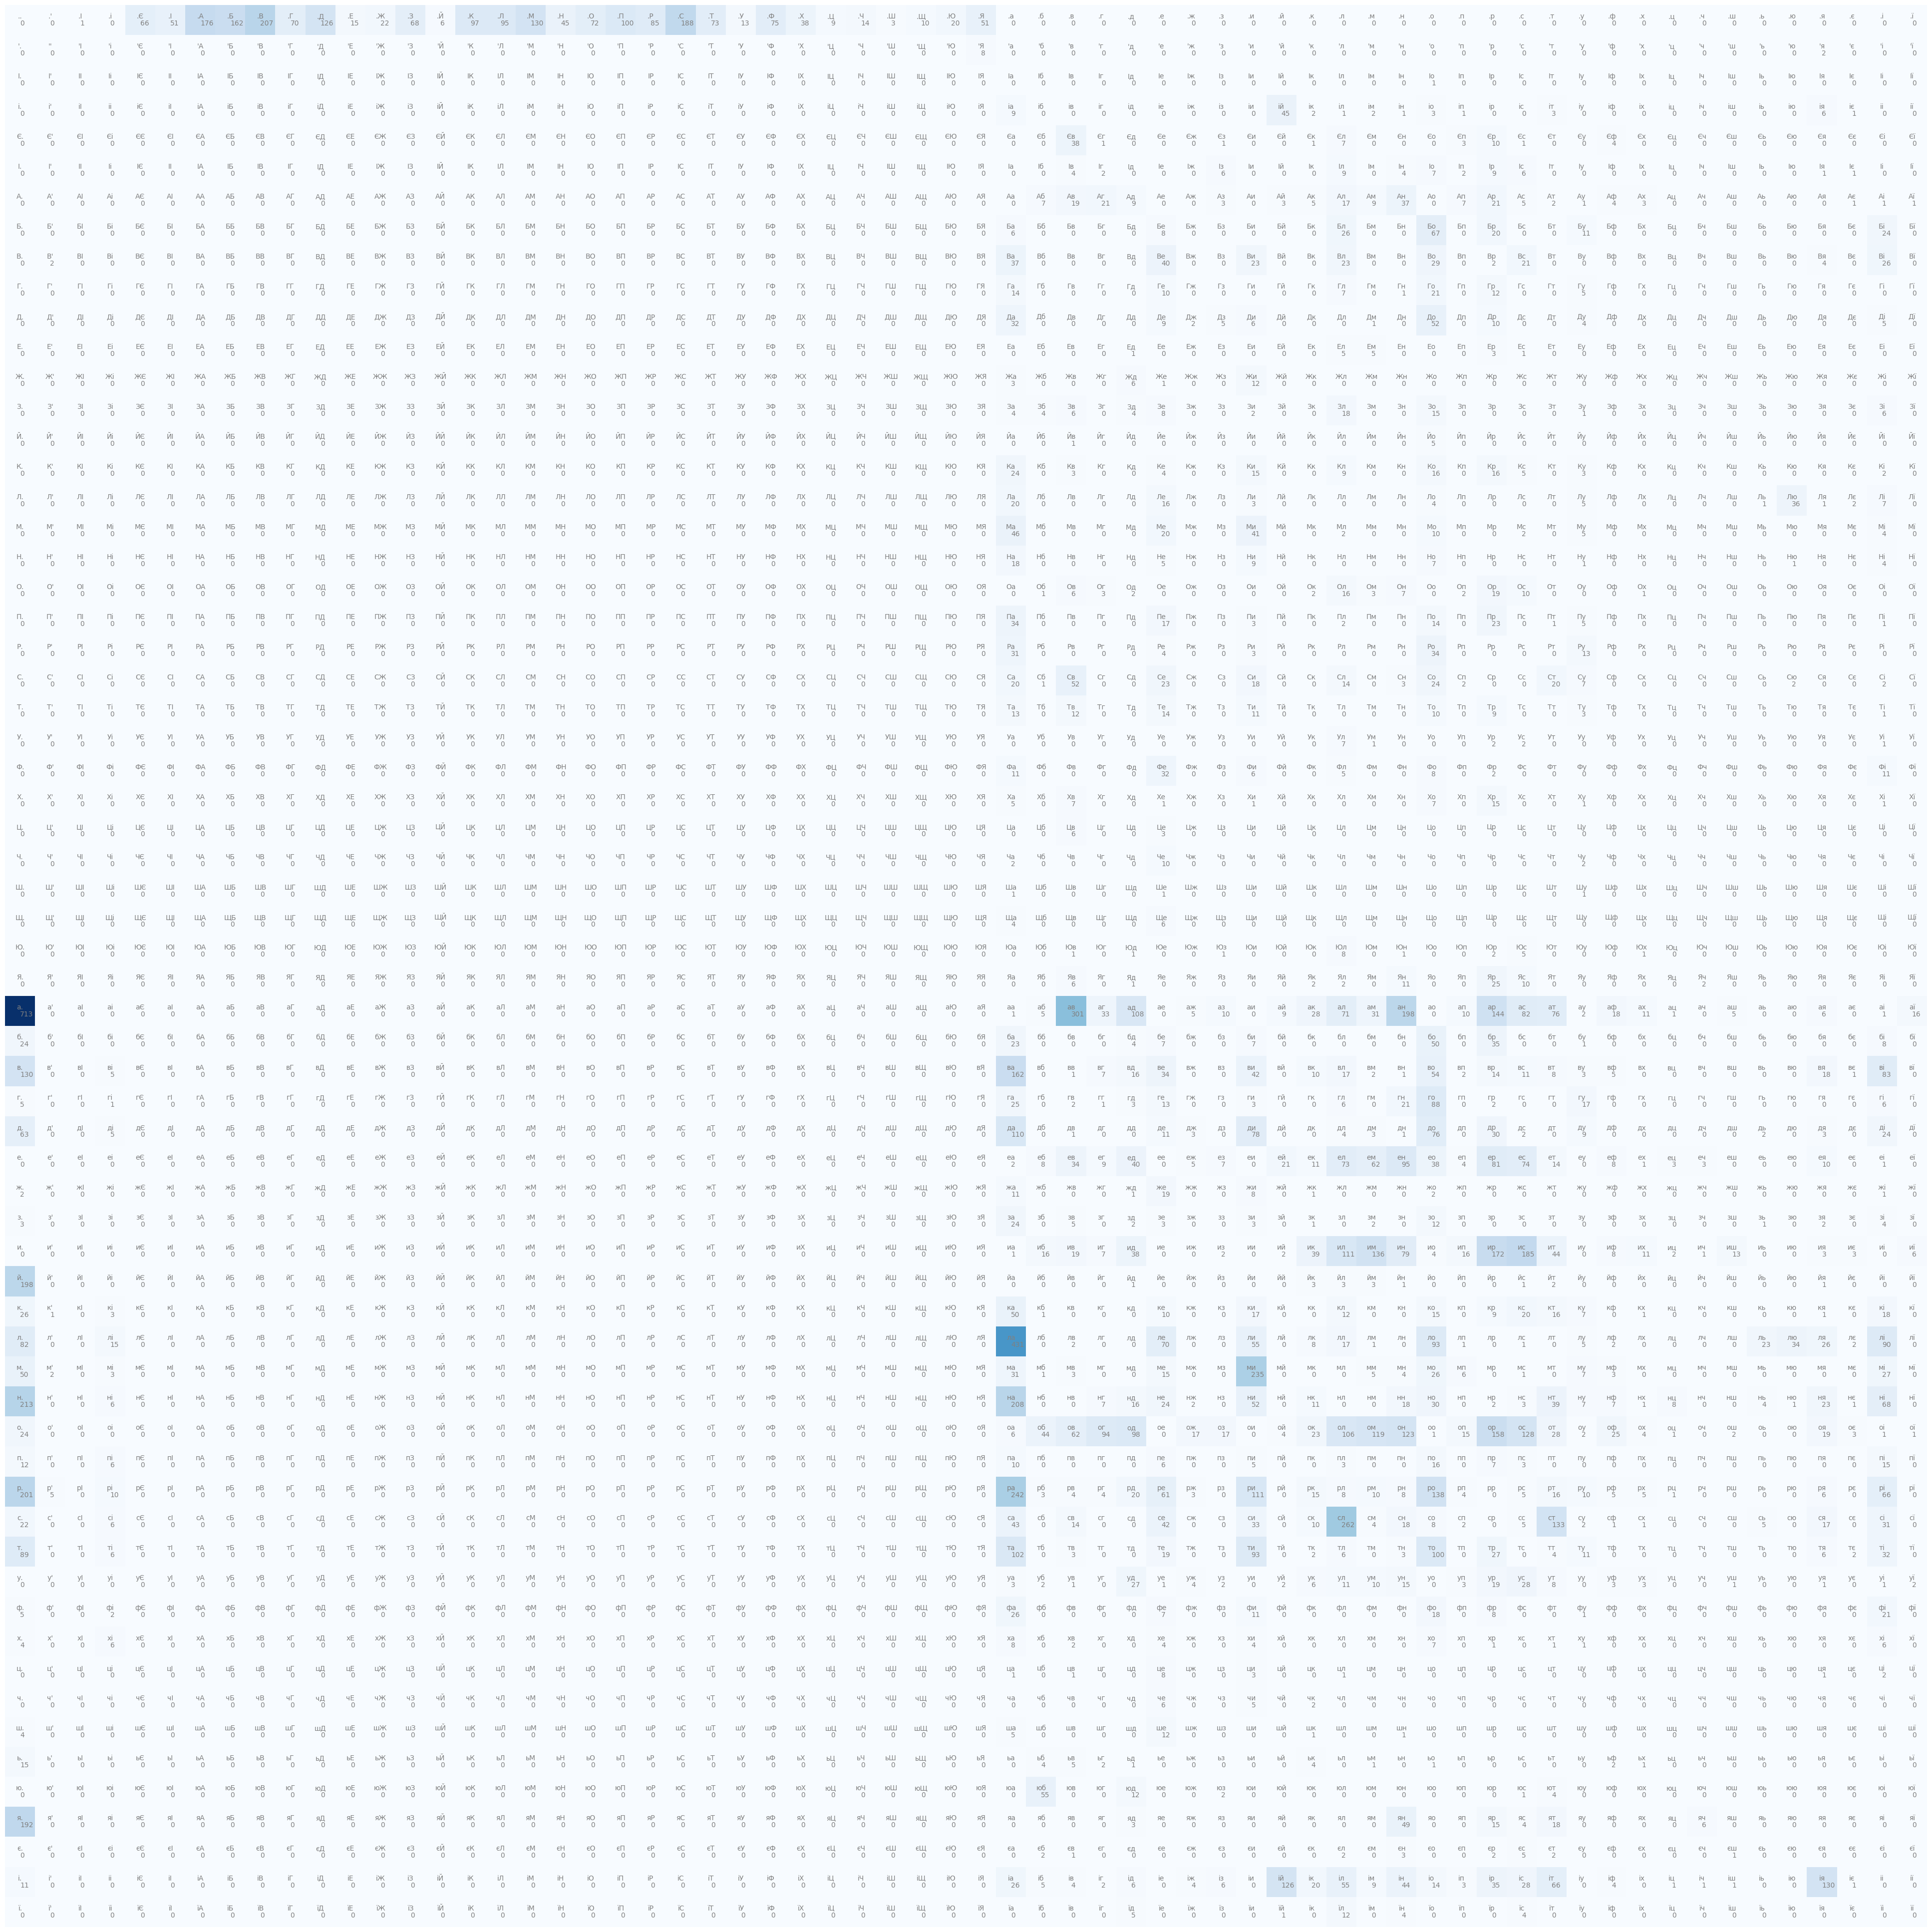

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (50,50))
plt.imshow(N, cmap = 'Blues')
for i in range(voc_size):
  for j in range(voc_size):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
    plt.text(j, i, N[i,j].item(), va = 'top', color = 'gray')
plt.axis('off');

#### What if choose random counts

In [37]:
N = torch.randint(0, 1000, (voc_size, voc_size), dtype=torch.int32)

In [39]:
N[0]

tensor([692, 128, 568, 615, 304, 177, 267, 127, 901, 463, 827,  61, 459, 624,
        627, 462, 375, 240, 466, 389, 338, 882, 505,  55, 132, 564,  70, 878,
        747, 821,  57, 134, 613, 964, 588, 314,  62, 471, 561, 340, 802, 548,
        746, 405, 772, 758, 499,  66, 265,  37, 760, 858, 868, 724,  67, 518,
        708, 125, 577, 984, 937, 454, 945, 837], dtype=torch.int32)

In [40]:
P = N.float() / N.sum(1, keepdim=True)

In [42]:
P[0].sum()

tensor(1.)

In [43]:
for i in range(10):
  out = []
  ix = 0
  while True:
    ix = torch.multinomial(P[ix], 1, replacement=True).item()
    out.append(itos[ix])

    if ix == 0:
      break
  print(''.join(out))

'ЕЧїОЛЧхнЮВЧДВЛІеїлДФАЩсн.
уЖВТЙєоГяшоБДуКЄЦДЄТХЄНУОiочєеВЯупхРЕЩстіДеиоКяiХцУюОвЕГiксХяЧЄIуГецйНТЯцїпЄУАУряАЛФШчжЖЕпоЙЄШцтіІОРшЯчпїнСЄУєУКБГДАЗяЗгиМшНЩОйоПїь.
ДцегхжЖЦНшцжнФЕЄП.
КмЄНрцтОялЦбД.
ВКахіЛвсКмЩТулiфIФсювсПРят'НЛННисшЦаьїiМл.
чЛГрчйГуiвЧЙНшЦПIДийОФЗїмвуЄгєЮЙнйхБ.
ЙТАрВсмФхЦвПрчЙтуюьтЗЙтаюбIдядвьЛшЩеОьГа.
мймГРЦєьiУХагНвЖшIКтуКіХшаЩ.
фЯВЛчЄГхшЖКрЯенїМАжЦнеГїміЩОЗнОЛуЙїм.
мйОЕтяршЩТєШФІiиЩвМпхгБнБ.


#### Generating names

In [22]:
for name in names:
  chs = ['.'] + list(name) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ctoix1 = stoi[ch1]
    ctoix2 = stoi[ch2]

    N[ctoix1, ctoix2] += 1

In [24]:
Probs = N.float() / N.sum(1, keepdim=True)

In [29]:
for i in range(10):
  out = []
  ix = 0
  while True:
    ix = torch.multinomial(Probs[ix], 1, replacement=True).item()
    out.append(itos[ix])

    if ix == 0:
      break
  print(''.join(out))

Дримасававгд.
Мивія.
Соля.
Свій.
Сва.
Кава.
Ров.
Дільктоїнавимифоян.
Бій.
Пагодисера.
